## Dengue Fever Prediction
By: Jack Ross

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_train.csv'),
                 pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_labels_train.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_test.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/submission_format.csv')

In [3]:
train['month'] = pd.DatetimeIndex(train['week_start_date']).month
test['month'] = pd.DatetimeIndex(test['week_start_date']).month

In [4]:
train, val = train_test_split(train, test_size=len(test),  
                              random_state=42)

## 231 Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?

In [5]:
target = 'total_cases'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [6]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

- [X] Is your problem regression or classification?

In [7]:
# My problem is a regression problem. I am trying to find a numerical
# (continuous) value for total_cases. 

- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.

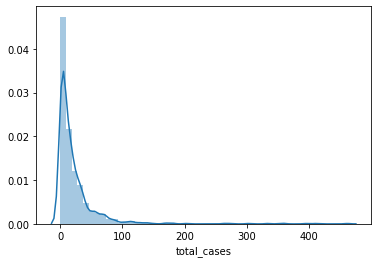

In [8]:
import seaborn as sns
sns.distplot(y_train)

# The target seems to be right-skewed

In [9]:
y_train_log = np.log1p(y_train)

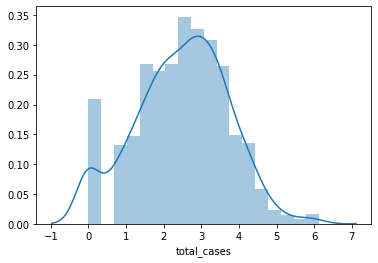

In [10]:
sns.distplot(y_train_log)

- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

In [11]:
# I will use root mean squared error (RMSE) for my evalutation metric
# FOR NOW. After I clean the data and look for outliers, I will revisit
# this because RMSE harshly penalizes outliers. I will also use 
# adjusted R squared because it will allow me to know how useful my
# predictor terms are.

- [X] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?

In [12]:
# I have done a 30% random split with train/val

In [13]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month
745,sj,2004,35,2004-08-26,0.099600,0.063300,0.100657,0.109429,20.30,300.912857,...,20.30,18.531429,2.642857,29.057143,6.485714,33.3,25.0,20.6,7,8
10,sj,1990,28,1990-07-09,0.192875,0.082350,0.191943,0.152929,22.27,299.512857,...,22.27,17.418571,2.157143,27.557143,7.157143,31.7,21.7,63.7,8,7
147,sj,1993,8,1993-02-26,NaN,0.133900,0.269929,0.261586,0.00,296.768571,...,0.00,13.827143,2.771429,25.700000,7.300000,32.2,20.6,5.5,13,2
1417,iq,2009,40,2009-10-01,0.206300,0.255257,0.279957,0.206657,57.18,298.034286,...,57.18,17.947143,8.514286,27.950000,12.225000,35.2,20.5,33.1,2,10
282,sj,1995,39,1995-10-01,0.106800,0.083667,0.092000,0.099343,36.72,300.155714,...,36.72,18.254286,1.900000,29.957143,7.285714,34.4,25.6,13.3,33,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,iq,2003,30,2003-07-23,0.285814,0.163071,0.288029,0.277457,2.64,296.485714,...,2.64,13.558571,11.428571,26.466667,10.366667,32.1,18.0,9.9,1,7
1130,iq,2004,13,2004-03-25,0.306283,0.198720,0.029880,0.290150,120.10,297.312857,...,120.10,18.237143,5.714286,28.650000,9.300000,34.0,23.6,142.6,3,3
1294,iq,2007,21,2007-05-21,0.364614,0.256829,0.329900,0.349686,64.11,297.232857,...,64.11,17.718571,8.957143,28.250000,10.550000,33.8,21.7,86.6,5,5
860,sj,2006,45,2006-11-12,-0.276100,-0.033100,0.215317,0.184357,6.61,300.880000,...,6.61,17.617143,2.585714,27.985714,6.128571,31.7,24.4,18.0,20,11


In [14]:
val

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month
497,sj,1999,46,1999-11-19,-0.045400,0.074700,0.051480,0.039433,83.66,298.968571,...,83.66,17.817143,1.814286,26.714286,5.800000,30.6,22.8,62.1,43,11
1261,iq,2006,39,2006-10-01,0.465500,0.241543,0.473400,0.493443,134.64,299.381429,...,134.64,17.254286,11.285714,28.566667,12.400000,35.2,22.0,63.0,6,10
411,sj,1998,13,1998-03-26,NaN,0.073100,0.188167,0.168500,0.00,298.502857,...,0.00,15.480000,2.557143,26.228571,6.900000,31.1,22.2,16.5,38,3
1046,iq,2002,33,2002-08-13,0.377157,0.305900,0.288400,0.360843,9.81,298.304286,...,9.81,13.441429,14.385714,27.833333,12.233333,35.1,20.6,7.1,7,8
1033,iq,2002,20,2002-05-14,0.133800,0.109633,0.219614,0.141700,46.79,296.784286,...,46.79,17.744286,5.085714,26.866667,9.700000,32.3,20.8,543.3,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,sj,1994,8,1994-02-26,NaN,0.092433,0.137757,0.074071,0.00,297.455714,...,0.00,14.157143,2.357143,25.742857,8.571429,30.6,20.6,7.9,37,2
478,sj,1999,27,1999-07-09,0.097467,0.086167,0.183857,0.178886,73.30,299.504286,...,73.30,17.295714,2.357143,27.400000,5.728571,31.1,22.8,36.6,14,7
1244,iq,2006,22,2006-06-04,0.098371,0.101067,0.186314,0.097750,79.48,295.987143,...,79.48,16.025714,6.885714,25.600000,8.933333,31.9,19.3,150.2,5,6
1440,iq,2010,10,2010-03-12,0.311729,0.292686,0.272586,0.394800,57.78,298.837143,...,57.78,20.091429,8.814286,28.550000,10.050000,35.4,21.4,44.5,12,3


- [X] Begin to clean and explore your data.

In [15]:
# Cleaning Checklist

# Null values - impute later
# Time series - already date time, make features
# Location split? - to do
# Numerical issues - none

In [16]:
train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [17]:
# Null value cleaning

train.isnull().sum()


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  139
ndvi_nw                                   35
ndvi_se                                   14
ndvi_sw                                   14
precipitation_amt_mm                      11
reanalysis_air_temp_k                      8
reanalysis_avg_temp_k                      8
reanalysis_dew_point_temp_k                8
reanalysis_max_air_temp_k                  8
reanalysis_min_air_temp_k                  8
reanalysis_precip_amt_kg_per_m2            8
reanalysis_relative_humidity_percent       8
reanalysis_sat_precip_amt_mm              11
reanalysis_specific_humidity_g_per_kg      8
reanalysis_tdtr_k                          8
station_avg_temp_c                        35
station_diur_temp_rng_c                   35
station_max_temp_c                        16
station_mi

In [18]:
# Column name issues

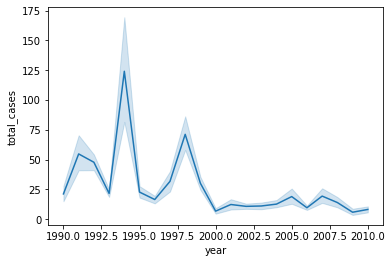

In [19]:
sns.lineplot(x='year', y='total_cases',data=train)

# A lot of values that should be ints are displayed as floats

- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [20]:
# Testing: splitting the data into 2 dataframes based on location
sj_train = train.loc[train['city'] == 'sj']
iq_train = train.loc[train['city'] == 'iq']

sj_test = test.loc[test['city'] == 'sj']
iq_test = test.loc[test['city'] == 'iq']

In [21]:
sj_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month
0,sj,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4
1,sj,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5
2,sj,2008,20,2008-05-13,-0.00150,NaN,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5
4,sj,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,sj,2013,13,2013-03-26,-0.08740,-0.016183,0.156343,0.105186,30.34,298.670000,...,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5,3
256,sj,2013,14,2013-04-02,-0.20325,-0.077833,0.204171,0.178914,6.55,298.035714,...,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6,4
257,sj,2013,15,2013-04-09,-0.11760,-0.008200,0.192700,0.170429,0.00,299.057143,...,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4,4
258,sj,2013,16,2013-04-16,0.08275,0.031200,0.135014,0.074857,0.00,298.912857,...,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9,4


- [ ] Continue to clean and explore your data.

In [22]:
# Time series cleaning / feature engineering


## SEASONS - I think seasonality could play into total cases of Dengue because the disease spreads from mosquitos
#            that thrive in hot/wet conditions.

# The climate of Puerto Rico is tropical, hot all year round, with a hot and muggy season from May to October
# and a relatively cool season from December to March, with November and April as intermediate months.

# Peru has two seasons owing to its proximity to the equator. These are not traditionally known as summer and
# winter, but as the rainy/wet season ('summer') which runs from December to March, and the dry season ('winter')
# which runs from May to September.

# SJ - hot/muggy season = YYYY-05-DD through YYYY-10-DD
# SJ - cool season = YYYY-12-DD through YYYY-03-DD
# SJ - intermediate season = YYYY-11-DD AND NOT THROUGH YYYY-04-DD

# IQ - rainy season = YYYY-12-DD through YYYY-03-DD
# IQ - dry season = YYYY-05-DD through YYYY-09-DD

from datetime import date, datetime

In [23]:
sj_train['month'] = pd.DatetimeIndex(sj_train['week_start_date']).month
iq_train['month'] = pd.DatetimeIndex(iq_train['week_start_date']).month

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
print('San Juan')
print('features: ', sj_train.shape)

print('\nIquitos')
print('features: ', iq_train.shape)

San Juan
features:  (674, 26)

Iquitos
features:  (366, 26)


In [25]:
# compute the correlations
sj_correlations = sj_train.corr()
iq_correlations = iq_train.corr()

Text(0.5, 1, 'San Juan Variable Correlations')

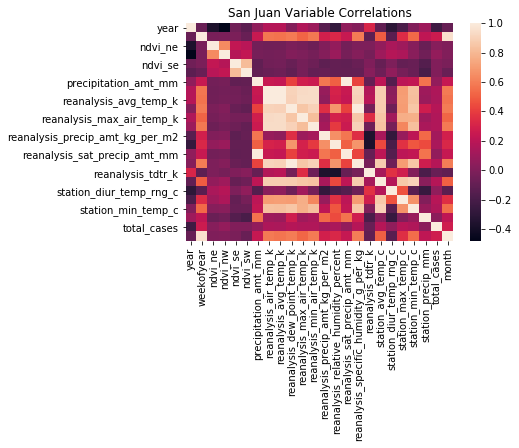

In [26]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

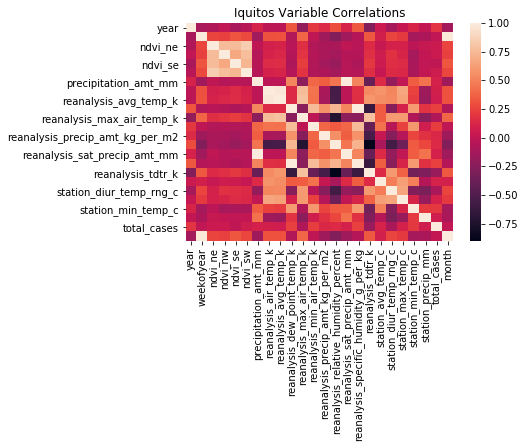

In [27]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

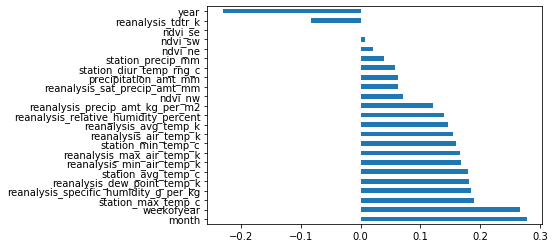

In [28]:
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

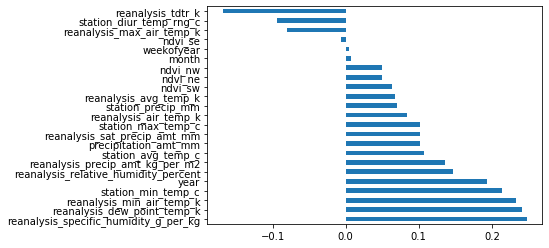

In [29]:
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

- [ ] For the evaluation metric you chose, what score would you get just by guessing?

- [ ] Can you make a fast, first model that beats guessing?

In [30]:
sj_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month
745,sj,2004,35,2004-08-26,0.099600,0.063300,0.100657,0.109429,20.30,300.912857,...,20.30,18.531429,2.642857,29.057143,6.485714,33.3,25.0,20.6,7,8
10,sj,1990,28,1990-07-09,0.192875,0.082350,0.191943,0.152929,22.27,299.512857,...,22.27,17.418571,2.157143,27.557143,7.157143,31.7,21.7,63.7,8,7
147,sj,1993,8,1993-02-26,NaN,0.133900,0.269929,0.261586,0.00,296.768571,...,0.00,13.827143,2.771429,25.700000,7.300000,32.2,20.6,5.5,13,2
282,sj,1995,39,1995-10-01,0.106800,0.083667,0.092000,0.099343,36.72,300.155714,...,36.72,18.254286,1.900000,29.957143,7.285714,34.4,25.6,13.3,33,10
298,sj,1996,4,1996-01-22,0.095800,0.138100,0.219457,0.222900,60.67,297.422857,...,60.67,15.208571,1.942857,25.585714,5.857143,28.9,22.2,47.7,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,1
330,sj,1996,36,1996-09-02,0.036400,0.030650,0.172900,0.175786,10.59,300.372857,...,10.59,18.485714,3.457143,28.485714,5.871429,33.3,23.3,35.1,19,9
466,sj,1999,15,1999-04-16,0.034100,0.035100,0.102786,0.097514,75.59,297.481429,...,75.59,13.974286,3.600000,25.385714,6.671429,30.0,21.1,19.8,15,4
121,sj,1992,35,1992-08-26,0.087500,0.081700,0.179943,0.221757,27.70,300.067143,...,27.70,17.458571,2.428571,28.271429,6.828571,32.2,23.9,3.1,59,8


In [31]:
target = 'total_cases'
y_train = train[target]
y_train.value_counts(normalize=True)

majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

from sklearn.metrics import accuracy_score

# Training accuracy of majority class baseline = 
# frequency of majority class (aka base rate)
accuracy_score(y_train, y_pred)

0.07115384615384615

In [32]:
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.0625

In [33]:
X_train = train.drop(target, axis=1)
y_train = train[target]
X_val = val.drop(target, axis=1)
y_val = val[target]
X_test = test

In [34]:
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
pipeline = make_pipeline(
   #ce.OneHotEncoder(),
   #ce.OrdinalEncoder(),  
   #ce.BaseNEncoder(),
   ce.HashingEncoder(),
   #ce.BinaryEncoder(),
   RobustScaler(),
   #KNNImputer(n_neighbors=7),
   SimpleImputer(strategy='mean'),
   #IterativeImputer(random_state=1,),
   #FactorAnalysis(n_components=7, random_state=0),
   #MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=100)
   RandomForestClassifier(n_jobs=-1, verbose=2, random_state=42)

)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100building tree 17 of 100

building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100

building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


Train Accuracy 1.0


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


Validation Accuracy 0.07692307692307693


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


- [ ] Fit a model. Does it beat your baseline? 

- [ ] Try xgboost.

In [35]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.BinaryEncoder(), 
    XGBClassifier(n_estimators=250, random_state=42, n_jobs=-1, verbose=1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('binaryencoder',
                 BinaryEncoder(cols=None, drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               mapping=None, return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_cons...one,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=250,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', random_state=42,
           

In [36]:
pipeline.score(X_train, y_train)

1.0

In [37]:
pipeline.score(X_val, y_val)

0.08653846153846154

- [ ] Get your model's permutation importances.

In [38]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/home/jack/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jack/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [40]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

reanalysis_air_temp_k                   -1.442308e-03
week_start_date                         -1.442308e-03
precipitation_amt_mm                    -1.442308e-03
reanalysis_precip_amt_kg_per_m2         -9.615385e-04
reanalysis_dew_point_temp_k              5.551115e-18
ndvi_se                                  8.326673e-18
reanalysis_sat_precip_amt_mm             4.807692e-04
reanalysis_avg_temp_k                    9.615385e-04
reanalysis_relative_humidity_percent     1.442308e-03
month                                    1.442308e-03
station_max_temp_c                       1.442308e-03
ndvi_ne                                  1.442308e-03
reanalysis_tdtr_k                        1.442308e-03
ndvi_sw                                  1.442308e-03
weekofyear                               1.923077e-03
station_precip_mm                        2.403846e-03
reanalysis_max_air_temp_k                5.769231e-03
reanalysis_min_air_temp_k                6.250000e-03
ndvi_nw                     

In [41]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, # No limit: show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
0.0087 ± 0.0120,year
0.0087 ± 0.0089,station_diur_temp_rng_c
0.0077 ± 0.0093,reanalysis_specific_humidity_g_per_kg
0.0077 ± 0.0088,station_min_temp_c
0.0072 ± 0.0053,city
0.0063 ± 0.0058,station_avg_temp_c
0.0063 ± 0.0049,ndvi_nw
0.0063 ± 0.0104,reanalysis_min_air_temp_k
0.0058 ± 0.0065,reanalysis_max_air_temp_k
0.0024 ± 0.0080,station_precip_mm


In [42]:
y_pred.shape

(416,)

In [43]:
y_val.shape

(416,)

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_pred)

25.576923076923077